<a href="https://colab.research.google.com/github/CelikAbdullah/my-deep-learning-notebooks/blob/main/image%20classification/Image_Classification_with_the_Fashion_MNIST_dataset_using_a_VGGNet_like_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

# Getting the Fashion MNIST dataset




In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

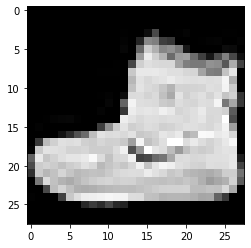

In [ ]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.show()
  

# Creating a validation dataset

In [ ]:
x_val = x_train[:10000]
x_train = x_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((50000,), (10000,), (10000,))

# Preparing the data

In [ ]:
x_train = x_train.reshape((50000, 28, 28, 1))
x_train = x_train.astype("float32") / 255

x_val = x_val.reshape((10000, 28, 28, 1))
x_val = x_val.astype("float32") / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype("float32") / 255

# Building a VGGNet-like model 

In [ ]:
inputs = keras.Input(shape=(28,28,1), name="input_layer")

# Conv block 1: Conv layer + Conv layer + Max Pooling
x = keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", use_bias=False, kernel_regularizer=keras.regularizers.l2(0.0005),  name="Conv-1")(inputs)
x = keras.layers.BatchNormalization(name="BatchNorm-1")(x)
x = keras.layers.Activation(activation="relu", name="Activation-1")(x)
x = keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", use_bias=False, kernel_regularizer=keras.regularizers.l2(0.0005),  name="Conv-2")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-2")(x)
x = keras.layers.Activation(activation="relu", name="Activation-2")(x)
x = keras.layers.MaxPool2D(pool_size=2, name="MaxPool-1")(x)

# Conv block 2: Conv layer + Conv layer + Max Pooling
x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", use_bias=False, kernel_regularizer=keras.regularizers.l2(0.0005), name="Conv-3")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-3")(x)
x = keras.layers.Activation(activation="relu", name="Activation-3")(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", use_bias=False,kernel_regularizer=keras.regularizers.l2(0.0005), name="Conv-4")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-4")(x)
x = keras.layers.Activation(activation="relu", name="Activation-4")(x)
x = keras.layers.MaxPool2D(pool_size=2, name="MaxPool-2")(x)

# Conv block 3: Conv layer + Conv layer + Conv layer + Max Pooling
x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", use_bias=False,kernel_regularizer=keras.regularizers.l2(0.0005), name="Conv-5")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-5")(x)
x = keras.layers.Activation(activation="relu", name="Activation-5")(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", use_bias=False,kernel_regularizer=keras.regularizers.l2(0.0005), name="Conv-6")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-6")(x)
x = keras.layers.Activation(activation="relu", name="Activation-6")(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", use_bias=False,kernel_regularizer=keras.regularizers.l2(0.0005), name="Conv-7")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-7")(x)
x = keras.layers.Activation(activation="relu", name="Activation-7")(x)
x = keras.layers.MaxPool2D(pool_size=2, name="MaxPool-3")(x)

# Conv block 4: Conv layer + Conv layer + Conv layer + Max Pooling
x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", use_bias=False,kernel_regularizer=keras.regularizers.l2(0.0005), name="Conv-8")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-8")(x)
x = keras.layers.Activation(activation="relu", name="Activation-8")(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", use_bias=False,kernel_regularizer=keras.regularizers.l2(0.0005), name="Conv-9")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-9")(x)
x = keras.layers.Activation(activation="relu", name="Activation-9")(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", use_bias=False,kernel_regularizer=keras.regularizers.l2(0.0005), name="Conv-10")(x)
x = keras.layers.BatchNormalization(name="BatchNorm-10")(x)
x = keras.layers.Activation(activation="relu", name="Activation-10")(x)
x = keras.layers.MaxPool2D(pool_size=2, name="MaxPool-4")(x)

x = keras.layers.Flatten(name="Flatten-1")(x)
x = keras.layers.Dense(256, activation="relu", name="Dense-1")(x)
x = keras.layers.Dropout(rate=0.5, name="Dropout-1")(x)
outputs = keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

my_vggnet_model = keras.Model(inputs=inputs, outputs=outputs, name="vggnet-like-img-classification-model")
my_vggnet_model.summary()

Model: "vggnet-like-img-classification-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 Conv-1 (Conv2D)             (None, 28, 28, 16)        144       
                                                                 
 BatchNorm-1 (BatchNormaliza  (None, 28, 28, 16)       64        
 tion)                                                           
                                                                 
 Activation-1 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 Conv-2 (Conv2D)             (None, 28, 28, 16)        2304      
                                                                 
 BatchNorm-2 (BatchNormaliza  (None, 28, 28, 16)       64        
 tion)                        

# Compiling the model

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum = 0.9)
loss ="sparse_categorical_crossentropy"
metrics=["accuracy"]

my_vggnet_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Setting up some callbacks

In [ ]:
callbacks = [
             keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/fashion_mnist/fashion_mnist_my_vggnet_model", 
                                             save_best_only=True, 
                                             monitor ="val_loss"), 
             keras.callbacks.EarlyStopping(patience=10), 
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
]

# Training the model

In [ ]:
history_my_vggnet_model = my_vggnet_model.fit(x=x_train, 
                        y=y_train, 
                        batch_size=128, 
                        epochs=100, 
                        callbacks=callbacks, 
                        validation_data=(x_val, y_val)
                        )

Epoch 1/100
391/391 [==============================] - 12s 28ms/step - loss: 1.9001 - accuracy: 0.4546 - val_loss: 2.1317 - val_accuracy: 0.3623 - lr: 1.0000e-04
Epoch 2/100
391/391 [==============================] - 9s 22ms/step - loss: 1.1504 - accuracy: 0.7058 - val_loss: 0.9108 - val_accuracy: 0.7848 - lr: 1.0000e-04
Epoch 3/100
391/391 [==============================] - 8s 21ms/step - loss: 0.9726 - accuracy: 0.7626 - val_loss: 0.8157 - val_accuracy: 0.8127 - lr: 1.0000e-04
Epoch 4/100
391/391 [==============================] - 8s 20ms/step - loss: 0.8802 - accuracy: 0.7935 - val_loss: 0.7619 - val_accuracy: 0.8279 - lr: 1.0000e-04
Epoch 5/100
391/391 [==============================] - 8s 21ms/step - loss: 0.8199 - accuracy: 0.8174 - val_loss: 0.7253 - val_accuracy: 0.8411 - lr: 1.0000e-04
Epoch 6/100
391/391 [==============================] - 8s 21ms/step - loss: 0.7794 - accuracy: 0.8303 - val_loss: 0.7019 - val_accuracy: 0.8499 - lr: 1.0000e-04
Epoch 7/100
391/391 [============

# Plotting the results

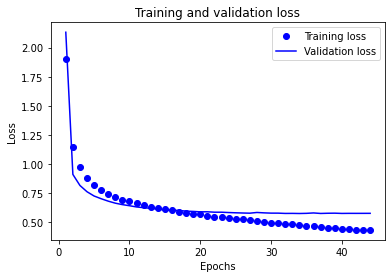

In [ ]:
loss = history_my_vggnet_model.history["loss"]
accuracy = history_my_vggnet_model.history["accuracy"]

val_loss = history_my_vggnet_model.history["val_loss"]
val_accuracy = history_my_vggnet_model.history["val_accuracy"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

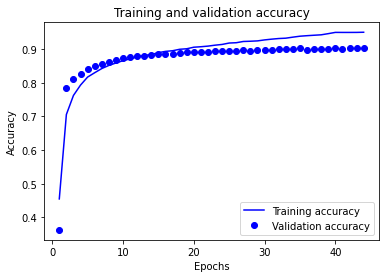

In [ ]:
plt.clf()
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loading the model

In [ ]:
my_vggnet_model = keras.models.load_model("/content/drive/MyDrive/fashion_mnist/fashion_mnist_my_vggnet_model")

# Evaluating the model

In [ ]:
test_loss, test_accuracy = my_vggnet_model.evaluate(x=x_test, y=y_test)
print(f"The test accuracy on new unseen data is {test_accuracy}")

313/313 [==============================] - 12s 37ms/step - loss: 0.6053 - accuracy: 0.8877
The test accuracy on new unseen data is 0.8877000212669373


In [ ]:
inputs = keras.Input(shape=(28,28,1))

def residual_block(x, filters, pooling=False):
  residual = x 

  x = keras.layers.Conv2D(filters, 3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation("relu")(x)
  x = keras.layers.Conv2D(filters, 3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation("relu")(x)
  x = keras.layers.Conv2D(filters, 3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation("relu")(x)

  if pooling: 
    x = keras.layers.MaxPooling2D(2, padding="same")(x)
    residual = keras.layers.Conv2D(filters, 1, strides=2)(residual)
  elif filters != residual.shape[-1]:
    residual = keras.layers.Conv2D(filters, 1)(residual)

  x = keras.layers.add([x, residual])

  return x


x = residual_block(inputs, 16, True)
x = residual_block(x, 32, True)
x = residual_block(x, 64, True)
x = residual_block(x, 128, True)
x = residual_block(x, 256, True)
x = residual_block(x, 512, True)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(rate=0.5)(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)


model_with_residual_blocks = keras.Model(inputs=inputs, outputs=outputs)
model_with_residual_blocks.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 16)   160         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 28, 28, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 28, 28, 16)   0           ['batch_normalization[0][0]']

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum = 0.9)
loss ="sparse_categorical_crossentropy"
metrics=["accuracy"]

model_with_residual_blocks.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
callbacks = [
             keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/fashion_mnist/fashion_mnist_model_with_residual_blocks", 
                                             save_best_only=True, 
                                             monitor ="val_loss"), 
             keras.callbacks.EarlyStopping(patience=10), 
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
]

In [ ]:
history_model_with_residual_blocks = model_with_residual_blocks.fit(x=x_train, 
                        y=y_train, 
                        batch_size=128, 
                        epochs=100, 
                        callbacks=callbacks, 
                        validation_data=(x_val, y_val)
                        )

Epoch 1/100
391/391 [==============================] - 56s 103ms/step - loss: 1.2670 - accuracy: 0.5908 - val_loss: 1.2277 - val_accuracy: 0.6013 - lr: 1.0000e-04
Epoch 2/100
391/391 [==============================] - 39s 99ms/step - loss: 0.6530 - accuracy: 0.7695 - val_loss: 0.5043 - val_accuracy: 0.8171 - lr: 1.0000e-04
Epoch 3/100
391/391 [==============================] - 38s 98ms/step - loss: 0.5340 - accuracy: 0.8102 - val_loss: 0.4533 - val_accuracy: 0.8347 - lr: 1.0000e-04
Epoch 4/100
391/391 [==============================] - 39s 99ms/step - loss: 0.4673 - accuracy: 0.8335 - val_loss: 0.4178 - val_accuracy: 0.8480 - lr: 1.0000e-04
Epoch 5/100
391/391 [==============================] - 38s 98ms/step - loss: 0.4131 - accuracy: 0.8512 - val_loss: 0.3954 - val_accuracy: 0.8590 - lr: 1.0000e-04
Epoch 6/100
391/391 [==============================] - 38s 97ms/step - loss: 0.3792 - accuracy: 0.8654 - val_loss: 0.3794 - val_accuracy: 0.8615 - lr: 1.0000e-04
Epoch 7/100
391/391 [======